In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
df = pd.read_csv('hwdataset.csv')
df.head()

,Weight,Height
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206


Text(0, 0.5, 'Height')

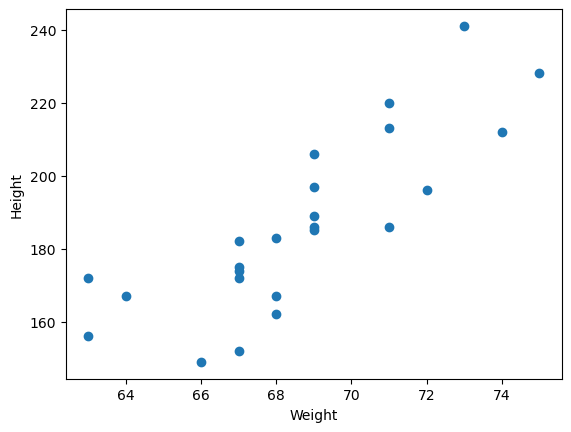

In [40]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [41]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.822081
Height,0.822081,1.000000


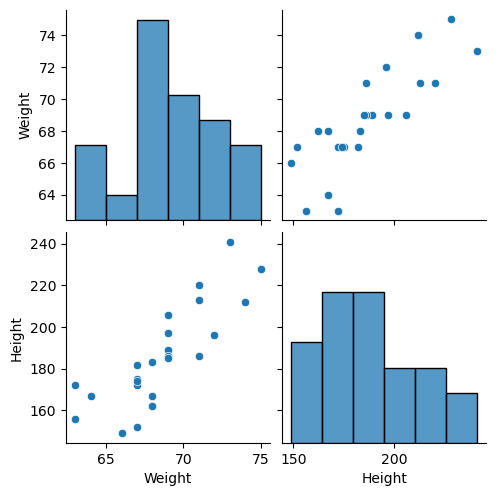

In [42]:
##seaborn
import seaborn as sns
sns.pairplot(df)

In [43]:
df.head()

,Weight,Height
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206


In [44]:
##Independent and dependent featrure
X=df[['Weight']]## this should br data frame or 2 dimensioanl array
y=df['Height'] ## this variable can be in series or 1d array
type(df)

pandas.core.frame.DataFrame

In [45]:
X_series=df['Weight']
np.array(X_series).shape


(24,)

In [46]:

np.array(y).shape

(24,)

### Train Test split
 By splitting the dataset into a training set and a testing set, you can train the model on one subset of data and test it on another, ensuring that the model's performance is assessed on data it hasn't seen before. This helps to simulate how the model will perform on unseen, real-world data and helps in identifying issues like overfitting and underfitting.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:

X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.25,random_state=42)

##### Standardization
Standardization is a preprocessing technique used to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [51]:
X_test=scaler.transform(X_test)

In [52]:
X_test

array([[-0.49634231],
       [ 1.22176568],
       [ 1.56538727],
       [ 0.19090089],
       [ 0.87814408],
       [-1.87082869]])

In [53]:
## Apply Simple linear Regression
from sklearn.linear_model import LinearRegression

In [54]:
regression = LinearRegression()

# Fit the model to the training data
regression.fit(x_train, y_train)

LinearRegression()

In [55]:
print("coefficient or slope:",regression.coef_)
print("intercept:",regression.intercept_)

coefficient or slope: [16.98169447]
intercept: 183.55555555555554


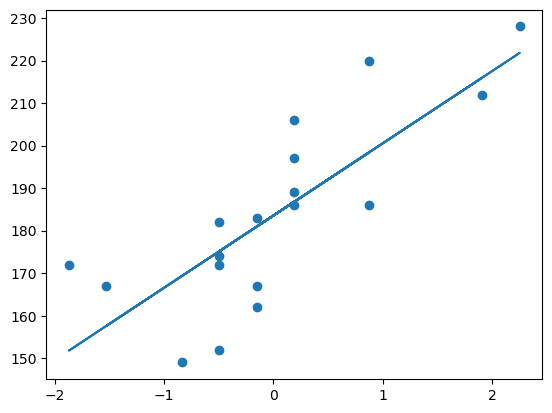

In [56]:
## plotting traing data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))

### predtiction of test data
1. prediction height output =intercept + coef_(weights)
2. y_pred=regression.predict(X_test)

In [57]:
## prediction for test data
y_pred=regression.predict(X_test)

In [61]:
## performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_error

In [1]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

NameError: name 'mean_squared_error' is not defined

In [63]:
from sklearn.metrics import r2_score


In [64]:
score=r2_score(y_test,y_pred)
print(score)

0.7188897462669368


In [67]:
#display adjusted r score
1 - (1 - score) * (len(y_test) - 1) / (len(y_test)-X_test.shape[1]-1)

0.6486121828336711

In [68]:
## ols linear regresssion

In [70]:
import statsmodels.api as sm

In [72]:
# Create an OLS model and fit it to the training data
pred = sm.OLS(y_train, X_train).fit()

# Make predictions on the testing data
prediction = model.predict(X_test)
print(prediction)


[ -8.4287334   20.74765144  26.58292841   3.24182054  14.91237447
 -31.76984127]


In [73]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1447
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                       0.708
Time:                        00:08:49   Log-Likelihood:                         -119.41
No. Observations:                  18   AIC:                                      240.8
Df Residuals:                      17   BIC:                                      241.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Abhinav Yadav\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [79]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\Abhinav Yadav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([204.303207])